In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding, SimpleRNN, RNN
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing import sequence
import tensorflow.keras.callbacks as CallB
from collections import defaultdict

input dim = len of vocab = 29
output dim = size of embedding vector = 10
input len = len of your seq = len of word?

In [2]:
#import data
import pandas as pd
df = pd.read_csv('h3data/data.txt', sep=" ",header=None)
odf = df

#change data from string to list of char
df[0] = df[0].astype(str).apply(lambda x:" ".join(list(x)))
df[1] = df[1].astype(str).apply(lambda x:" ".join(list(x)))

In [3]:
df.columns = {"Encoder Input", "Output"}
df["Decoder Input"] = df["Output"].apply(lambda x: "<start> "+x[:-1])
df.head()

,Encoder Input,Output,Decoder Input
0,a p p r e h e n s i v e,a p p r e h e n s i v e w a y,<start> a p p r e h e n s i v e w a
1,d e s p e r a t e l y,e s p e r a t e l y d a y,<start> e s p e r a t e l y d a
2,g r e w,e w g r a y,<start> e w g r a
3,n i g g a r d l y,i g g a r d l y n a y,<start> i g g a r d l y n a
4,b r o u g h t,o u g h t b r a y,<start> o u g h t b r a


In [4]:
#split testing and training data
train, test = train_test_split(df, test_size=0.2)

In [5]:
vocab_list = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','\'','-','*','<start>']
# '1','2','3','4','5','6','7','8','9','0',
vocab = defaultdict(lambda : 0)
count = 1

for i in vocab_list:
    if vocab[i]==0:
        vocab[i] = count
        count += 1

In [6]:
X_train_encoder = [[vocab[char] for char in x.split() if vocab[char] != 0] for x in train["Encoder Input"].values]
X_train_decoder = [[vocab[char] for char in x.split() if vocab[char] != 0] for x in train["Decoder Input"].values]
Y_train = [[vocab[char] for char in x.split() if vocab[char] != 0] for x in train["Output"].values]
# print(Y_train)
X_test_encoder = [[vocab[char] for char in x.split() if vocab[char] != 0] for x in test["Encoder Input"].values]
X_test_decoder = [[vocab[char] for char in x.split() if vocab[char] != 0] for x in test["Decoder Input"].values]
Y_test = [[vocab[char] for char in x.split() if vocab[char] != 0] for x in test["Output"].values]

In [7]:
X_train_encoder = sequence.pad_sequences(X_train_encoder, maxlen=50)
X_train_decoder = sequence.pad_sequences(X_train_decoder, maxlen=50)
Y_train = sequence.pad_sequences(Y_train, maxlen=50)
# print(Y_train)
X_test_encoder = sequence.pad_sequences(X_test_encoder, maxlen=50)
X_test_decoder = sequence.pad_sequences(X_test_decoder, maxlen=50)
Y_test = sequence.pad_sequences(Y_test, maxlen=50)

In [8]:
# Refer to 8:10
def Encoder(vocab_size=31,embedding_size=10,input_length=50):
    encoder_inputs = Input(shape=(input_length,))
    encoder_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=input_length)(encoder_inputs)
    encoder_outputs, encoder_last_state = SimpleRNN(embedding_size, return_sequences=True, return_state=True)(encoder_embeddings)

    return encoder_inputs, encoder_outputs, encoder_last_state

def Decoder(encoder_last_state, vocab_size=31, embedding_size=10, input_length=50):
    # Set up the decoder, using encoder_states as initial state.
    decoder_inputs = Input(shape=(input_length,))
    decoder_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=input_length)(decoder_inputs)
    decoder_RNN,_ = SimpleRNN(embedding_size, return_sequences=True, return_state=True)(decoder_embeddings, initial_state=encoder_last_state)
    decoder_outputs = Dense(vocab_size, activation="softmax")(decoder_RNN)
    
    return decoder_inputs, decoder_outputs

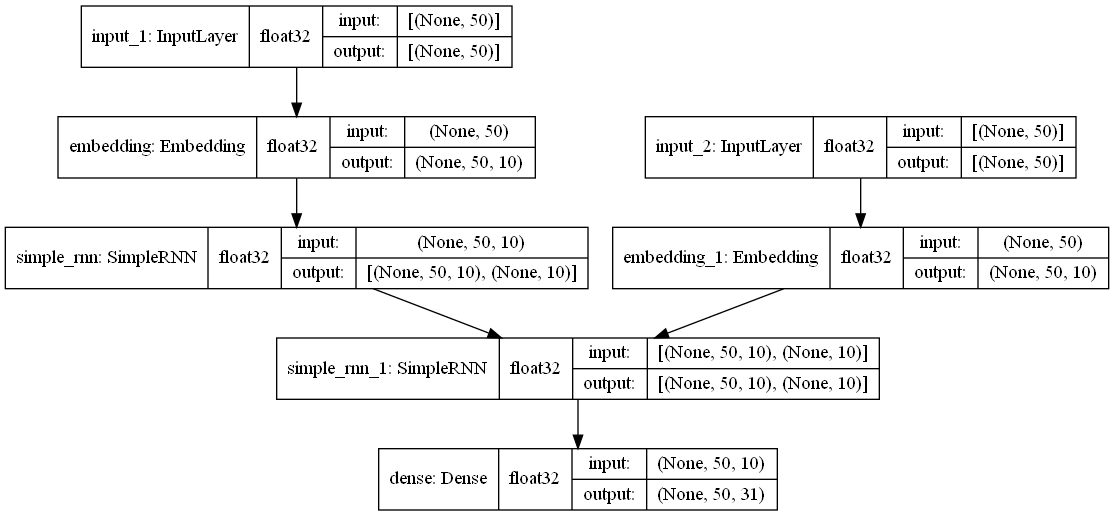

In [9]:
encoder_inputs, encoder_outputs, encoder_last_state = Encoder()
decoder_inputs, decoder_outputs = Decoder(encoder_last_state)
RNNmodel = Model([encoder_inputs, decoder_inputs], [decoder_outputs])
plot_model(RNNmodel,show_shapes=True, show_dtype=True, show_layer_names=True)

In [10]:
RNNmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
RNNmodel.fit([X_train_encoder, X_train_decoder], Y_train, batch_size=16, epochs=30, validation_data=([X_test_encoder, X_test_decoder], Y_test))
y_pred = RNNmodel.predict([X_test_encoder, X_test_decoder])

Epoch 1/30
326/326 [==============================] - 9s 24ms/step - loss: 1.5168 - accuracy: 0.7146 - val_loss: 0.6865 - val_accuracy: 0.8158
Epoch 2/30
326/326 [==============================] - 8s 23ms/step - loss: 0.6130 - accuracy: 0.8458 - val_loss: 0.5459 - val_accuracy: 0.8549
Epoch 3/30
326/326 [==============================] - 8s 24ms/step - loss: 0.5254 - accuracy: 0.8537 - val_loss: 0.4946 - val_accuracy: 0.8601
Epoch 4/30
326/326 [==============================] - 9s 26ms/step - loss: 0.4867 - accuracy: 0.8615 - val_loss: 0.4648 - val_accuracy: 0.8672
Epoch 5/30
326/326 [==============================] - 10s 31ms/step - loss: 0.4624 - accuracy: 0.8663 - val_loss: 0.4466 - val_accuracy: 0.8698
Epoch 6/30
326/326 [==============================] - 9s 27ms/step - loss: 0.4472 - accuracy: 0.8687 - val_loss: 0.4349 - val_accuracy: 0.8714
Epoch 7/30
326/326 [==============================] - 8s 23ms/step - loss: 0.4373 - accuracy: 0.8706 - val_loss: 0.4269 - val_accuracy: 0.873

## 4. If you input a very long sentence, do you have problem of translation this sentence? If so, what could be potentially the problem? Write down the answer. [2 Points]


### Ans: So for long sentence sequences, the Simple RNN model would not run fine as it has a problem of vanishing gradient. So to tackle the problem, we could use LSTM or GRU model which has a new gate called reset gate, which basically means that it'll try to remember from long sequences which one has a higher importance.

5. What model or activation function can you use the improve long sentence translation? Implement such a model. [2 Points]

In [11]:
def Encoder(vocab_size=31,embedding_size=10,input_length=50):
    encoder_inputs = Input(shape=(input_length,))
    encoder_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=input_length)(encoder_inputs)
    encoder_outputs, encoder_cell_last_state, encoder_hidden_state = LSTM(embedding_size, return_state=True)(encoder_embeddings)

    return encoder_inputs, encoder_outputs, [encoder_cell_last_state, encoder_hidden_state]

def Decoder(encoder_last_state, vocab_size=31, embedding_size=10, input_length=50):
    # Set up the decoder, using encoder_states as initial state.
    decoder_inputs = Input(shape=(input_length,))
    decoder_embeddings = Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=input_length)(decoder_inputs)
    decoder_RNN,_,_ = LSTM(embedding_size, return_sequences=True, return_state=True)(decoder_embeddings, initial_state=encoder_last_state)
    decoder_outputs = Dense(vocab_size, activation="softmax")(decoder_RNN)
    
    return decoder_inputs, decoder_outputs

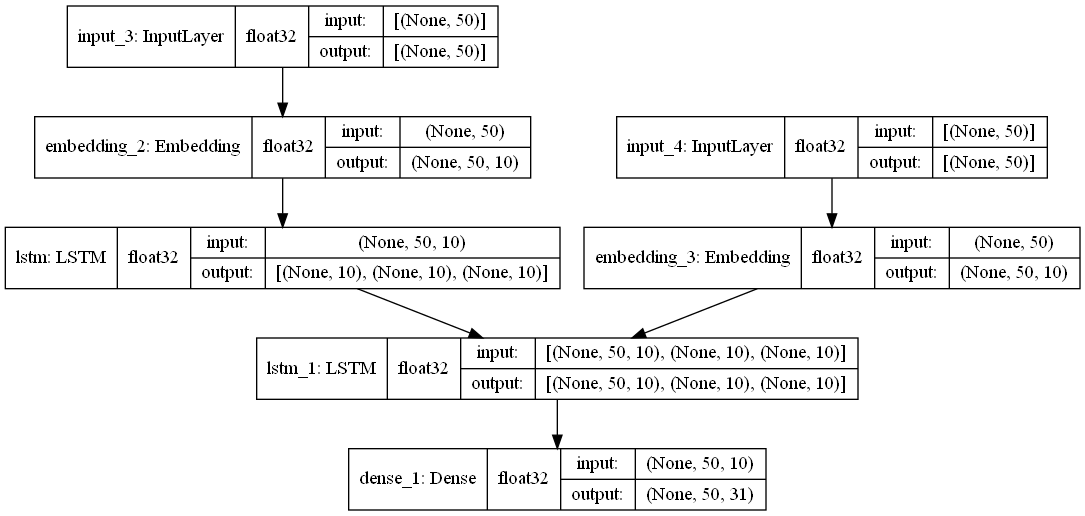

In [12]:
encoder_inputs, encoder_outputs, encoder_last_state = Encoder()
decoder_inputs, decoder_outputs = Decoder(encoder_last_state)
LSTMmodel = Model([encoder_inputs, decoder_inputs], [decoder_outputs])
plot_model(LSTMmodel,show_shapes=True, show_dtype=True, show_layer_names=True)

In [13]:
LSTMmodel.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
LSTMmodel.fit([X_train_encoder, X_train_decoder], Y_train, batch_size=16, epochs=30, validation_data=([X_test_encoder, X_test_decoder], Y_test))
y_pred = LSTMmodel.predict([X_test_encoder, X_test_decoder])

Epoch 1/30
326/326 [==============================] - 17s 44ms/step - loss: 1.4547 - accuracy: 0.7876 - val_loss: 0.7334 - val_accuracy: 0.8084
Epoch 2/30
326/326 [==============================] - 13s 39ms/step - loss: 0.6581 - accuracy: 0.8200 - val_loss: 0.5982 - val_accuracy: 0.8363
Epoch 3/30
326/326 [==============================] - 16s 51ms/step - loss: 0.5748 - accuracy: 0.8437 - val_loss: 0.5381 - val_accuracy: 0.8515
Epoch 4/30
326/326 [==============================] - 14s 44ms/step - loss: 0.5304 - accuracy: 0.8538 - val_loss: 0.5089 - val_accuracy: 0.8570
Epoch 5/30
326/326 [==============================] - 14s 43ms/step - loss: 0.5055 - accuracy: 0.8552 - val_loss: 0.4868 - val_accuracy: 0.8582
Epoch 6/30
326/326 [==============================] - 14s 43ms/step - loss: 0.4835 - accuracy: 0.8579 - val_loss: 0.4654 - val_accuracy: 0.8645
Epoch 7/30
326/326 [==============================] - 15s 45ms/step - loss: 0.4641 - accuracy: 0.8648 - val_loss: 0.4501 - val_accuracy: